 ## 1.Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

#importing vizualization libraries

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")

## Import the dataset 

The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable indicating whether an applicant eventually defaulted or was seriously delinquent. This adverse outcome occurred in 1,189 cases (20%). For each applicant, 12 input variables were recorded.


BAD=1=client defaulted on loan 0 = loan repaid
LOAN=Amount of the loan request
MORTDUE=Amount due on existing mortgage
VALUE=Value of current property
REASON=DebtCon  debt consolidation HomeImp = home improvement
JOB=Six occupational categories
YOJ=Years at present job
DEROG=Number of major derogatory reports
DELINQ=Number of delinquent credit lines
CLAGE=Age of oldest trade line in months
NINQ=Number of recent credit lines
CLNO=Number of credit lines
DEBTINC=Debt-to-income ratio


In [2]:
data=pd.read_csv("C:/Users/user/Downloads/Compressed/hmeq.csv")
data.head(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


## 2.Exploratory Data Analysis

You first begin by finding information about the data set and describing(summary)



In [3]:
data.shape

(5960, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int64
LOAN       5960 non-null int64
MORTDUE    5442 non-null float64
VALUE      5848 non-null float64
REASON     5708 non-null object
JOB        5681 non-null object
YOJ        5445 non-null float64
DEROG      5252 non-null float64
DELINQ     5380 non-null float64
CLAGE      5652 non-null float64
NINQ       5450 non-null float64
CLNO       5738 non-null float64
DEBTINC    4693 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [5]:
data.rename(columns=lambda x: x.lower(),inplace=True)
data.rename(columns={"bad":"target"},inplace=True)

In [6]:
data.head(5)

,target,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [7]:
#finding the columns in the dataset
data.columns

Index(['target', 'loan', 'mortdue', 'value', 'reason', 'job', 'yoj', 'derog',
       'delinq', 'clage', 'ninq', 'clno', 'debtinc'],
      dtype='object')

In [8]:
data.describe()

,target,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


## Data visualization

In [9]:
data.columns

Index(['target', 'loan', 'mortdue', 'value', 'reason', 'job', 'yoj', 'derog',
       'delinq', 'clage', 'ninq', 'clno', 'debtinc'],
      dtype='object')

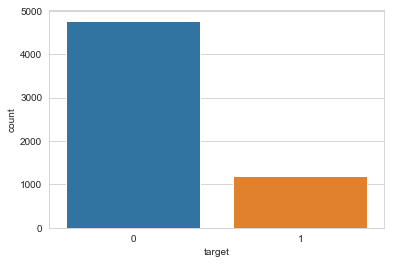

In [10]:
#visualizing the number of defaulters and those who paid 
sns.countplot(data['target'])

In [11]:
data["job"].value_counts()

Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: job, dtype: int64

In [12]:
#grouping the data according to total number of  defaulters per each job group and visualizing 
total=data.groupby(["job",'target'])["target"].count()
print(total)

job      target
Mgr      0          588
         1          179
Office   0          823
         1          125
Other    0         1834
         1          554
ProfExe  0         1064
         1          212
Sales    0           71
         1           38
Self     0          135
         1           58
Name: target, dtype: int64


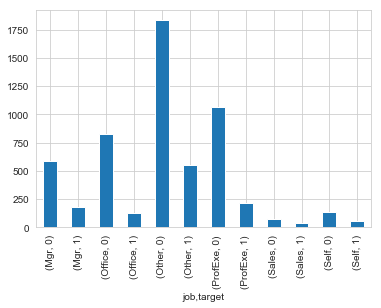

In [13]:
total.plot.bar()

In [14]:
data['target'].value_counts()

0    4771
1    1189
Name: target, dtype: int64

In [15]:
data.reason.value_counts()

DebtCon    3928
HomeImp    1780
Name: reason, dtype: int64

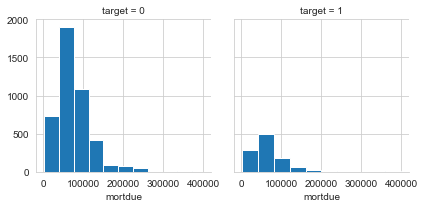

In [16]:
#distribution of morgage due in both 0 and 1
a=sns.FacetGrid(data,col="target")
a.map(plt.hist, "mortdue")

## Data cleaning
you find the Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

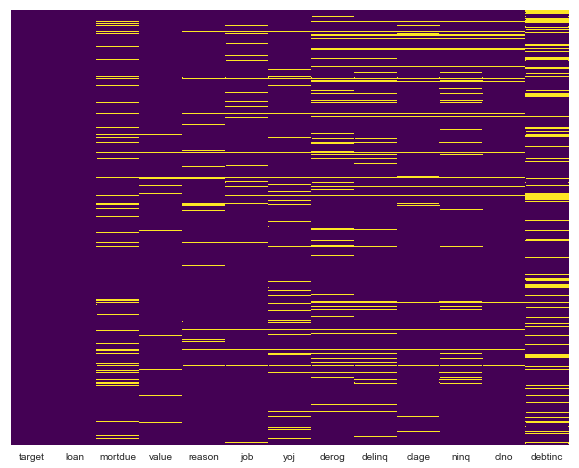

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(data.isnull(),cmap='viridis',yticklabels=False,cbar=False)

The above heatmap shows that mortdue,value,reason,job,yoj,derog,deiling,dage,ninq and debtinc contain missing values.
You can also isnull() function to find th total missing values in each column as shown below

In [18]:
data.isnull().sum()

target        0
loan          0
mortdue     518
value       112
reason      252
job         279
yoj         515
derog       708
delinq      580
clage       308
ninq        510
clno        222
debtinc    1267
dtype: int64

Next,Replace the missing values in each column. You can either replace the values with mean(in numerical variables)or mode(in categorical variables). you can also choose to drop the whole column in case if the missing variables are many

In [19]:
#first,find unique values in categorical columns(reason,job)
print(data['reason'].value_counts())
print("")
print(data['job'].value_counts())

DebtCon    3928
HomeImp    1780
Name: reason, dtype: int64

Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: job, dtype: int64


In [20]:
data["mortdue"].fillna(value=data["mortdue"].notnull().mean(),inplace=True)
data["value"].fillna(value=data["value"].notnull().mean(),inplace=True)
data["reason"].fillna(value=data["reason"].notnull().mode()[0],inplace=True)
data["job"].fillna(value=data["job"].notnull().mode()[0],inplace=True)
data["yoj"].fillna(value=data["yoj"].notnull().mean(),inplace=True)
data["derog"].fillna(value=data["derog"].notnull().mean(),inplace=True)
data["delinq"].fillna(value=data["delinq"].notnull().mean(),inplace=True)
data["clage"].fillna(value=data["clage"].notnull().mean(),inplace=True)
data["ninq"].fillna(value=data["ninq"].notnull().mean(),inplace=True)
data["clno"].fillna(value=data["clno"].notnull().mean(),inplace=True)
data["debtinc"].fillna(value=data["debtinc"].notnull().mean(),inplace=True)

In [21]:
data.isnull().sum()

target     0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64

Next,Find the correlation of the variables to find variables which correlate. If their correlation equal or above 0.6,you eliminate one of the variables to avoid multicolliniality.

In [22]:
data.corr()

,target,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
target,1.000000,-0.075099,-0.043094,-0.088416,-0.038945,0.238449,0.331110,-0.162657,0.170516,-0.010766,-0.415157
loan,-0.075099,1.000000,0.198999,0.320961,0.082139,-0.020986,-0.038405,0.113791,0.046219,0.104061,0.127193
mortdue,-0.043094,0.198999,1.000000,0.765802,-0.009398,-0.066889,-0.007306,0.145300,0.048439,0.386243,0.146103
value,-0.088416,0.320961,0.765802,1.000000,0.030871,-0.079362,-0.061695,0.182921,-0.003450,0.263006,0.137092
yoj,-0.038945,0.082139,-0.009398,0.030871,1.000000,-0.089468,0.024953,0.205021,-0.048396,0.092776,-0.015135
derog,0.238449,-0.020986,-0.066889,-0.079362,-0.089468,1.000000,0.240042,-0.109556,0.159416,0.019978,-0.136065
delinq,0.331110,-0.038405,-0.007306,-0.061695,0.024953,0.240042,1.000000,0.001765,0.064829,0.118907,-0.186153
clage,-0.162657,0.113791,0.145300,0.182921,0.205021,-0.109556,0.001765,1.000000,-0.095279,0.372366,0.089401
ninq,0.170516,0.046219,0.048439,-0.003450,-0.048396,0.159416,0.064829,-0.095279,1.000000,0.090434,-0.070990
clno,-0.010766,0.104061,0.386243,0.263006,0.092776,0.019978,0.118907,0.372366,0.090434,1.000000,0.088485


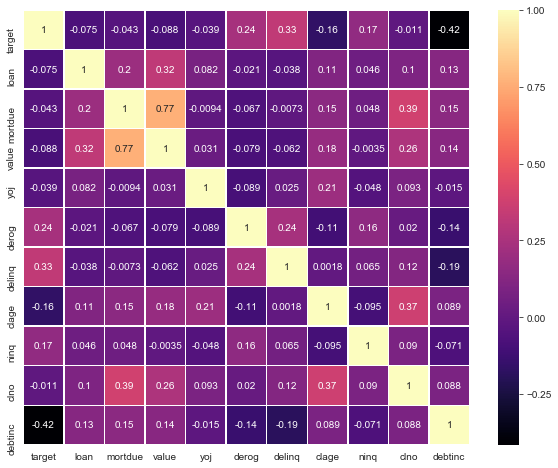

In [23]:
#plotting heatmap to show correlation
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,linewidths=0.5,linecolor='white',cmap='magma')

In [24]:
#drop either mortdue or value since their corrrelation is high
data.drop('value',axis=1,inplace=True)

## Converting Categorical Features 

Convert categorical features to dummy variables using pandas to enable the model to directly take in those features as inputs.

In [25]:
reason = pd.get_dummies(data[['reason','job']],drop_first=False)


In [26]:
#join the two datasets(reason and data)
data=pd.concat([data,reason],axis=1)

In [27]:
#drop column reason and job
data.drop(['reason','job'],axis=1,inplace=True)

In [28]:
data.head(5)

,target,loan,mortdue,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_True,reason_DebtCon,reason_HomeImp,job_True,job_Mgr,job_Office,job_Other,job_ProfExe,job_Sales,job_Self
0,1,1100,25860.000000,10.500000,0.000000,0.000000,94.366667,1.00000,9.000000,0.787416,0,0,1,0,0,0,1,0,0,0
1,1,1300,70053.000000,7.000000,0.000000,2.000000,121.833333,0.00000,14.000000,0.787416,0,0,1,0,0,0,1,0,0,0
2,1,1500,13500.000000,4.000000,0.000000,0.000000,149.466667,1.00000,10.000000,0.787416,0,0,1,0,0,0,1,0,0,0
3,1,1500,0.913087,0.913591,0.881208,0.902685,0.948322,0.91443,0.962752,0.787416,1,0,0,1,0,0,0,0,0,0
4,0,1700,97800.000000,3.000000,0.000000,0.000000,93.333333,0.00000,14.000000,0.787416,0,0,1,0,0,1,0,0,0,0


# Building a Logistic Regression model

Lstart by splitting  data into features and target and then to  a training set and test set.

## Train Test Split

In [29]:
#splitting data into features(x) and target(y)
x=data.drop("target",axis=1)
y=data['target']

But first standardize the data to improve the results

In [30]:
#standardizing the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit(x)
x_scaled=scaled.transform(x)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [31]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()

,loan,mortdue,yoj,derog,delinq,clage,ninq,clno,debtinc,reason_True,reason_DebtCon,reason_HomeImp,job_True,job_Mgr,job_Office,job_Other,job_ProfExe,job_Sales,job_Self
0,-1.562299,-0.877399,0.299426,-0.401425,-0.457285,-0.823702,-0.098396,-1.081753,-1.675337,-0.210116,-1.390349,1.532421,-0.221610,-0.384316,-0.434909,1.223034,-0.521936,-0.136489,-0.182938
1,-1.544453,0.057158,-0.162293,-0.401425,1.395759,-0.526634,-0.702753,-0.613003,-1.675337,-0.210116,-1.390349,1.532421,-0.221610,-0.384316,-0.434909,1.223034,-0.521936,-0.136489,-0.182938
2,-1.526606,-1.138779,-0.558052,-0.401425,-0.457285,-0.227762,-0.098396,-0.988003,-1.675337,-0.210116,-1.390349,1.532421,-0.221610,-0.384316,-0.434909,1.223034,-0.521936,-0.136489,-0.182938
3,-1.526606,-1.424246,-0.965211,0.673739,0.379072,-1.834079,-0.150111,-1.835243,-1.675337,4.759285,-1.390349,-0.652562,4.512428,-0.384316,-0.434909,-0.817639,-0.521936,-0.136489,-0.182938
4,-1.508759,0.643929,-0.689972,-0.401425,-0.457285,-0.834879,-0.702753,-0.613003,-1.675337,-0.210116,-1.390349,1.532421,-0.221610,-0.384316,2.299330,-0.817639,-0.521936,-0.136489,-0.182938


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.30, random_state=100)

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
pred=model.predict(X_test)

In [36]:
pred.shape

(1788,)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))
print("")
print("The confusion matrix:\n",confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1438
           1       0.82      0.51      0.63       350

   micro avg       0.88      0.88      0.88      1788
   macro avg       0.85      0.74      0.78      1788
weighted avg       0.88      0.88      0.87      1788


The confusion matrix:
 [[1398   40]
 [ 170  180]]


# Testing the quality of  model using AUC and ROC curve

* Area Under Curve: like the AUC, summarizes the integral or an approximation of the area under the precision-recall curve.


In [38]:
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score  

In [39]:
auc = roc_auc_score(y_test, pred)  
print('AUC: %.2f' % auc) 

AUC: 0.74


In [40]:
fpr, tpr, thresholds = roc_curve(y_test, pred)  

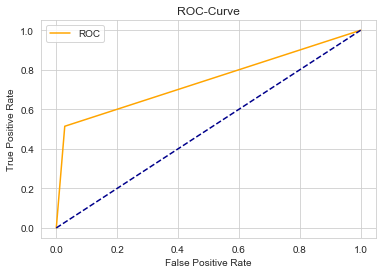

In [41]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Curve')
plt.legend()
plt.show()